<a href="https://colab.research.google.com/github/manoelfernander/analise_de_treino/blob/main/Treino_05_06_press%C3%A3o_de_pneu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Treino do dia 05/06**

- Piloto: Breno

- Local: Tecnip

- Traçado: Enduro

- Condições: pista seca, final da manhã (10 às 13), sol forte, muito quente

- Pneus: Hoosier

- Objetivos: Teste de pressões de pneu (14, 12 e 10psi)

- Análises: Comparação entre as amostras com todas as voltas com dados úteis (depois somente entre as 2 vezes com 14psi); comparação entre as 2 melhores voltas, a pior e a mediana de cada uma entre si (de uma mesma pressão); comparação da melhor e depois pior volta de cada pressão (entre todas as pressões, depois somente entre as 2 vezes com 14psi).

- Conclusões do Race Studio:

- Conclusões do código:
  - Como discutido em AD: não podemos fazer testes de setup com os novos pilotos. Por mais constante que seja (como é o caso do Breno), ele, como os outros, ainda está se acostumando com um formula. Isso foi comprovado pelo relato dele e pela própria análise dos dados. Com 14psi ele sentiu uma coisa, com 12 outra, com 10 outra, mas ao voltar para os 14, ele também sentiu outra. O único feedback pertinente que tiramos é de que com 10psi, se ele, que tem certamente o melhor condicionamento físico entre os pilotos, sentiu pesado, 10psi não vai ser bom para ninguém. Para os próximos, precisamos que o Pedrão realize os testes com diferentes configurações e deixem os novos para treinarem e serem analisados por uma única métrica: o próprio desempenho.

  - Não é uma análise muito útil, mas, a partir dos dados, percebe-se que o Breno "pegou mais o jeito" a partir de 10psi, que é onde a diferença é maior. Lembro na quarta ele comentando que, conforme foi pilotando, foi aprendendo a fazer o puntataco e, junto com a maior prática, deixa claro, principalmente nos histogramas de RPM, a evolução que ele teve no dia. Isso é positivo para o desempenho dele, mas negativo para a análise do setup (como comentado no tópico anterior). Mesmo que mais difícil (segundo ele, com 10psi o carro ficou mais pesado e cansou mais), foi uma certa virada de chave na pilotagem. Com isso, podemos chegar a uma segunda conclusão, além da fadiga inevitável com 10psi para os pilotos: condições mais difíceis podem forçar a melhora em condições melhores.

In [ ]:
# Importando bibliotecas para análise
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import numpy as np

#Importando dados em CSV para um data frame

#Amostras com todas as voltas
psi14_1 = pd.read_csv('/content/Enduro_Breno_14PSI_1_09_05-03-22_a_1365.csv') #primeira vez andando com 14psi
psi12 = pd.read_csv('/content/Enduro_Breno_12PSI_09_05-03-22_a_1366.csv')
psi10 = pd.read_csv('/content/Enduro_Breno_10PSI_09_05-03-22_a_1369.csv')
psi14_2 = pd.read_csv('/content/Enduro_Breno_14PSI_2_09_05-03-22_a_1370.csv') #segunda vez andando com 14psi


In [ ]:
#Voltas 14psi (1)
psi14_1_melhor = pd.read_csv('/content/Enduro_Breno_14PSI_1_volta9_09_05-03-22_a_1365.csv')
psi14_1_2melhor = pd.read_csv('/content/Enduro_Breno_14PSI_1_volta7_09_05-03-22_a_1365.csv')
psi14_1_mediana = pd.read_csv('/content/Enduro_Breno_14PSI_1_volta6_09_05-03-22_a_1365.csv')
psi14_1_pior = pd.read_csv('/content/Enduro_Breno_14PSI_1_volta4_09_05-03-22_a_1365.csv')

#Voltas 12psi
psi12_melhor = pd.read_csv('/content/Enduro_Breno_12PSI_volta6_09_05-03-22_a_1366.csv')
psi12_2melhor = pd.read_csv('/content/Enduro_Breno_12PSI_volta7_09_05-03-22_a_1366.csv')
psi12_mediana = pd.read_csv('/content/Enduro_Breno_12PSI_volta4_09_05-03-22_a_1366.csv')
psi12_pior = pd.read_csv('/content/Enduro_Breno_12PSI_volta3_09_05-03-22_a_1366.csv')

#Voltas 10psi
psi10_melhor = pd.read_csv('/content/Enduro_Breno_10PSI_volta6_09_05-03-22_a_1369.csv')
psi10_2melhor = pd.read_csv('/content/Enduro_Breno_10PSI_volta7_09_05-03-22_a_1369.csv')
psi10_mediana = pd.read_csv('/content/Enduro_Breno_10PSI_volta3_09_05-03-22_a_1369.csv')
psi10_pior = pd.read_csv('/content/Enduro_Breno_10PSI_volta2_09_05-03-22_a_1369.csv')

#Voltas 14psi (2)
psi14_2_melhor = pd.read_csv('/content/Enduro_Breno_14 PSI_2_volta9_09_05-03-22_a_1370.csv')
psi14_2_2melhor = pd.read_csv('/content/Enduro_Breno_14 PSI_2_volta8_09_05-03-22_a_1370.csv')
psi14_2_mediana = pd.read_csv('/content/Enduro_Breno_14 PSI_2_volta5_09_05-03-22_a_1370.csv')
psi14_2_pior = pd.read_csv('/content/Enduro_Breno_14 PSI_2_volta3_09_05-03-22_a_1370.csv')

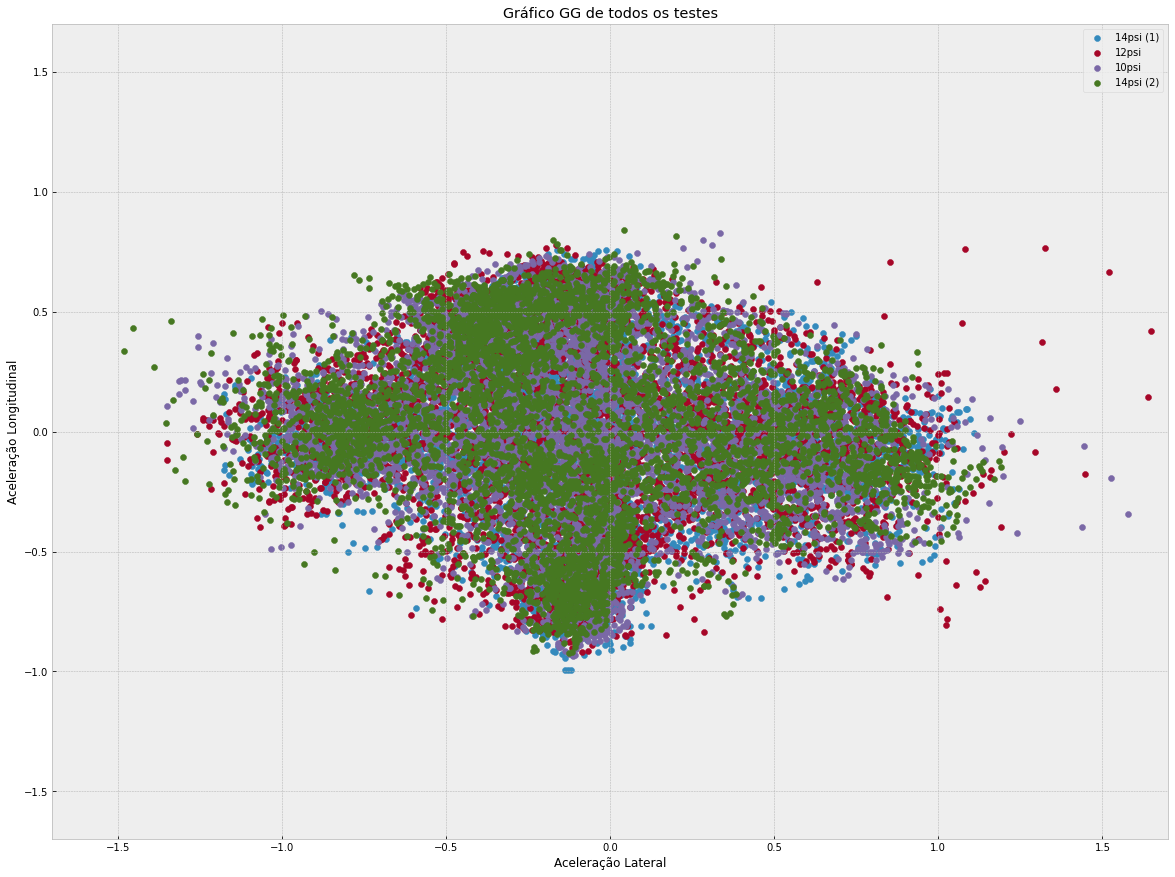

In [ ]:
#Gráfico GG de aceleração longitudinal x aceleração lateral - todos

psi14_1_filtrado = psi14_1[psi14_1['RPM']>3000]
psi12_filtrado = psi12[psi12['RPM']>3000]
psi10_filtrado = psi10[psi10['RPM']>3000]
psi14_2_filtrado = psi14_2[psi14_2['RPM']>3000]


plt.scatter(psi14_1_filtrado['GPS_LatAcc'], psi14_1_filtrado['GPS_LonAcc'], label="14psi (1)")
plt.scatter(psi12_filtrado['GPS_LatAcc'], psi12_filtrado['GPS_LonAcc'], label="12psi")
plt.scatter(psi10_filtrado['GPS_LatAcc'], psi10_filtrado['GPS_LonAcc'], label="10psi")
plt.scatter(psi14_2_filtrado['GPS_LatAcc'], psi14_2_filtrado['GPS_LonAcc'], label="14psi (2)")

plt.xlim(-1.7, 1.7)
plt.ylim(-1.7, 1.7)
plt.title('Gráfico GG de todos os testes') #adicionando o título
plt.xlabel('Aceleração Lateral')
plt.ylabel('Aceleração Longitudinal')
plt.legend()
plt.rcParams['figure.figsize'] = (20,15)
plt.style.use('bmh')
#plt.savefig('Gráfico GG de todos os testes.png')
plt.show()

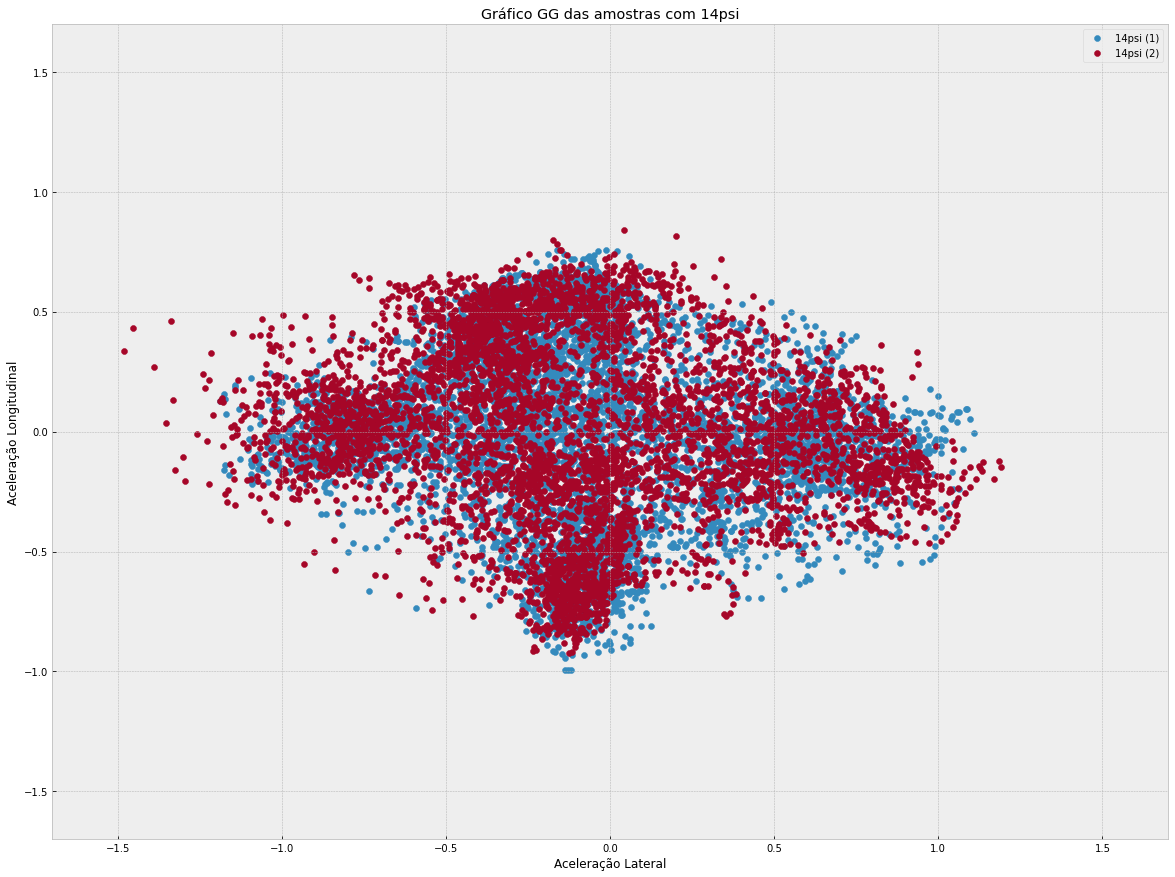

In [ ]:
#Gráfico GG de aceleração longitudinal x aceleração lateral - 14psi

psi14_1_filtrado = psi14_1[psi14_1['RPM']>3000]
psi14_2_filtrado = psi14_2[psi14_2['RPM']>3000]

plt.scatter(psi14_1_filtrado['GPS_LatAcc'], psi14_1_filtrado['GPS_LonAcc'], label="14psi (1)")
plt.scatter(psi14_2_filtrado['GPS_LatAcc'], psi14_2_filtrado['GPS_LonAcc'], label="14psi (2)")

plt.xlim(-1.7, 1.7)
plt.ylim(-1.7, 1.7)
plt.title('Gráfico GG das amostras com 14psi') #adicionando o título
plt.xlabel('Aceleração Lateral')
plt.ylabel('Aceleração Longitudinal')
plt.legend()
plt.rcParams['figure.figsize'] = (20,15)
plt.style.use('bmh')
#plt.savefig('Gráfico GG das amostras com 14psi.png')
plt.show()

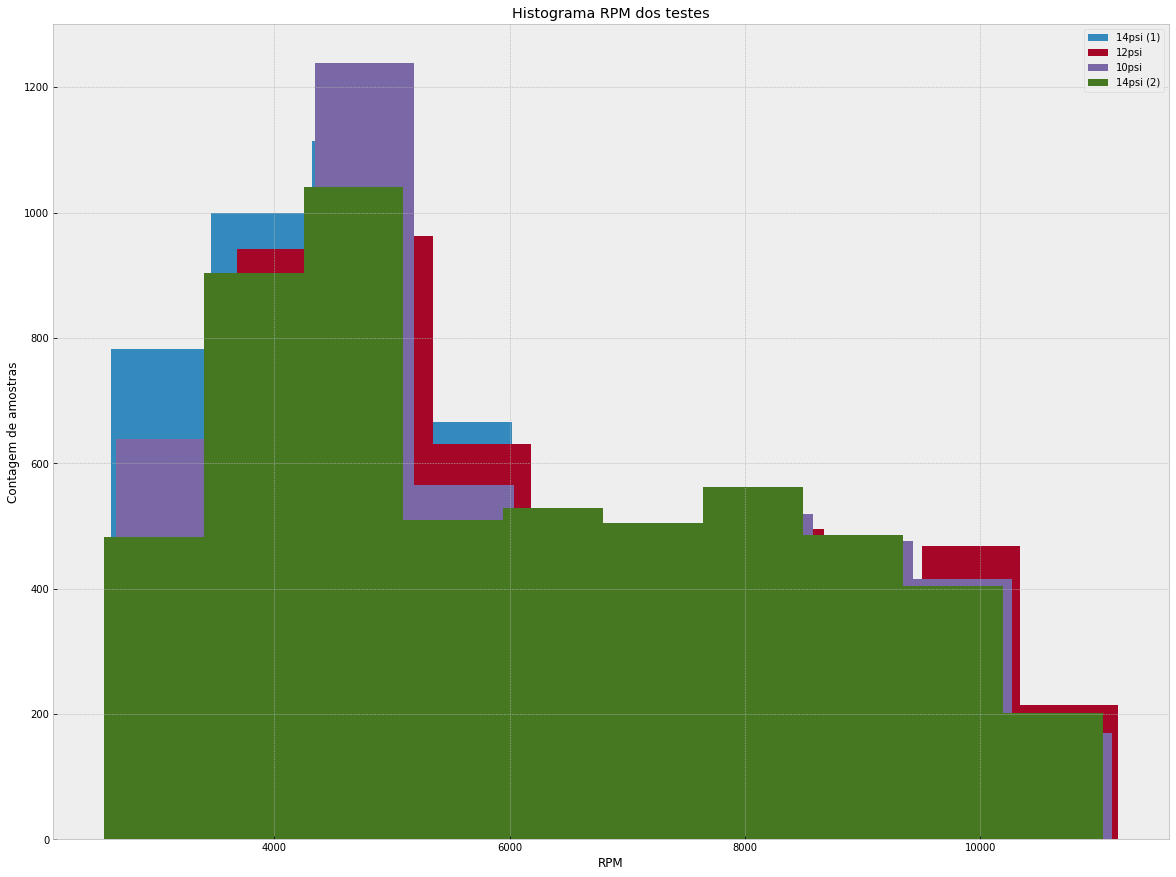

In [ ]:
#Histograma de RPM - todos

psi14_1['RPM'].fillna(psi14_1['RPM'].mean(), inplace=True)
plt.hist(psi14_1['RPM'], bins = 10, label = "14psi (1)")

psi12['RPM'].fillna(psi12['RPM'].mean(), inplace=True)
plt.hist(psi12['RPM'], bins = 10, label = "12psi")

psi10['RPM'].fillna(psi10['RPM'].mean(), inplace=True)
plt.hist(psi10['RPM'], bins = 10, label = "10psi")

psi14_2['RPM'].fillna(psi14_2['RPM'].mean(), inplace=True)
plt.hist(psi14_2['RPM'], bins = 10, label = "14psi (2)")


plt.title('Histograma RPM dos testes')
plt.xlabel('RPM')
plt.ylabel('Contagem de amostras')
plt.legend()
plt.style.use('bmh')
#plt.show
plt.savefig('Histograma RPM dos testes.png')

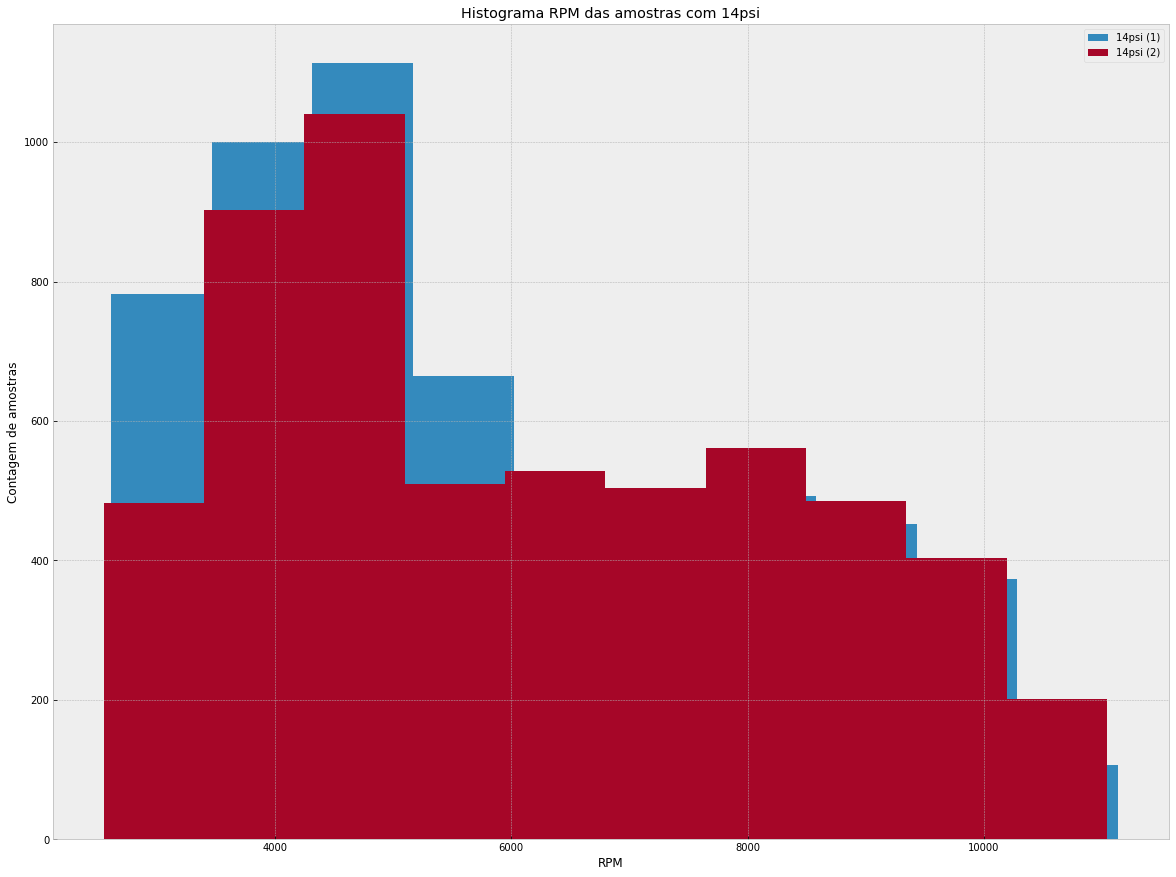

In [ ]:
#Histograma de RPM - 14psi

psi14_1['RPM'].fillna(psi14_1['RPM'].mean(), inplace=True)
plt.hist(psi14_1['RPM'], bins = 10, label = "14psi (1)")

psi14_2['RPM'].fillna(psi14_2['RPM'].mean(), inplace=True)
plt.hist(psi14_2['RPM'], bins = 10, label = "14psi (2)")


plt.title('Histograma RPM das amostras com 14psi')
plt.xlabel('RPM')
plt.ylabel('Contagem de amostras')
plt.legend()
plt.style.use('bmh')
#plt.show
plt.savefig('Histograma RPM das amostras com 14psi.png')

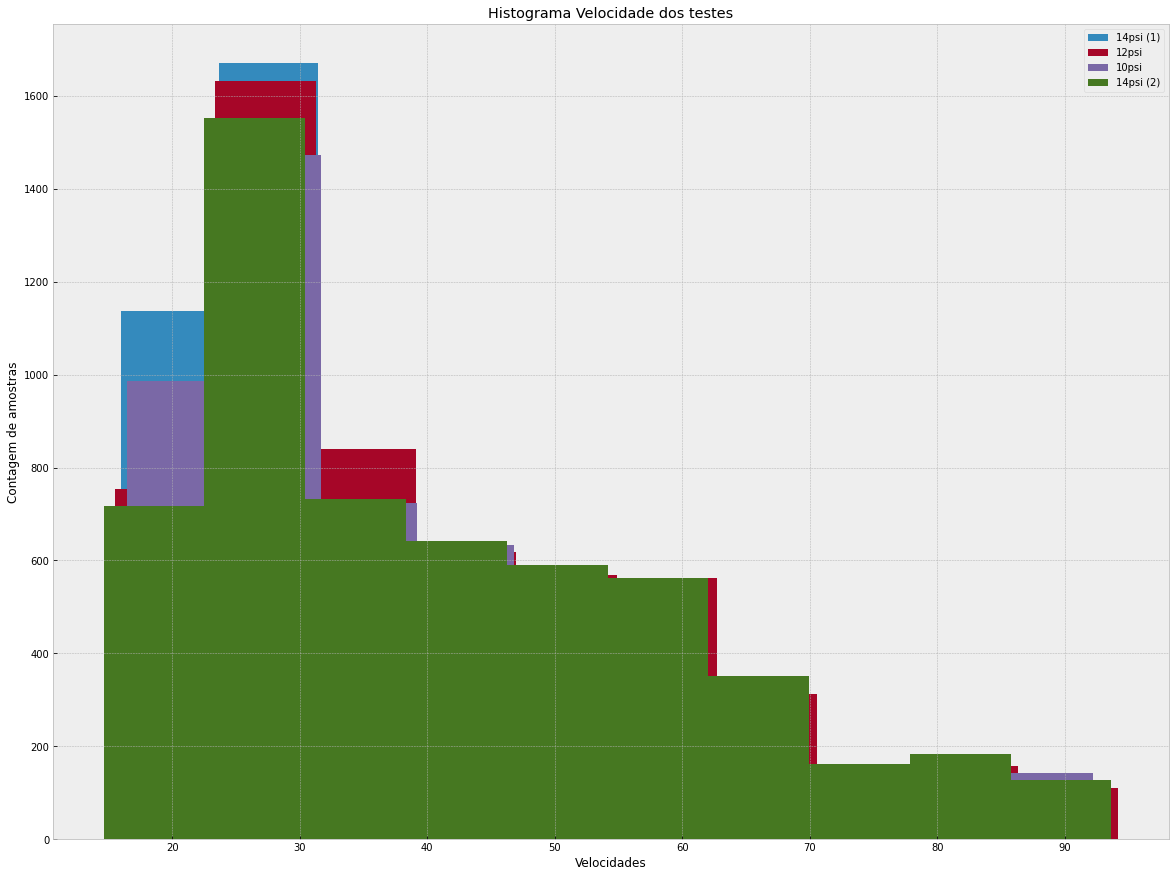

In [ ]:
#Histograma de velocidade - todos

psi14_1['GPS_Speed'].fillna(psi14_1['GPS_Speed'].mean(), inplace=True)
plt.hist(psi14_1['GPS_Speed'], bins = 10, label = "14psi (1)")

psi12['GPS_Speed'].fillna(psi12['GPS_Speed'].mean(), inplace=True)
plt.hist(psi12['GPS_Speed'], bins = 10, label = "12psi")

psi10['GPS_Speed'].fillna(psi10['GPS_Speed'].mean(), inplace=True)
plt.hist(psi10['GPS_Speed'], bins = 10, label = "10psi")

psi14_2['GPS_Speed'].fillna(psi14_2['GPS_Speed'].mean(), inplace=True)
plt.hist(psi14_2['GPS_Speed'], bins = 10, label = "14psi (2)")


plt.title('Histograma Velocidade dos testes')
plt.xlabel('Velocidades')
plt.ylabel('Contagem de amostras')
plt.legend()
plt.style.use('bmh')
#plt.show
plt.savefig('Histograma RPM dos testes.png')

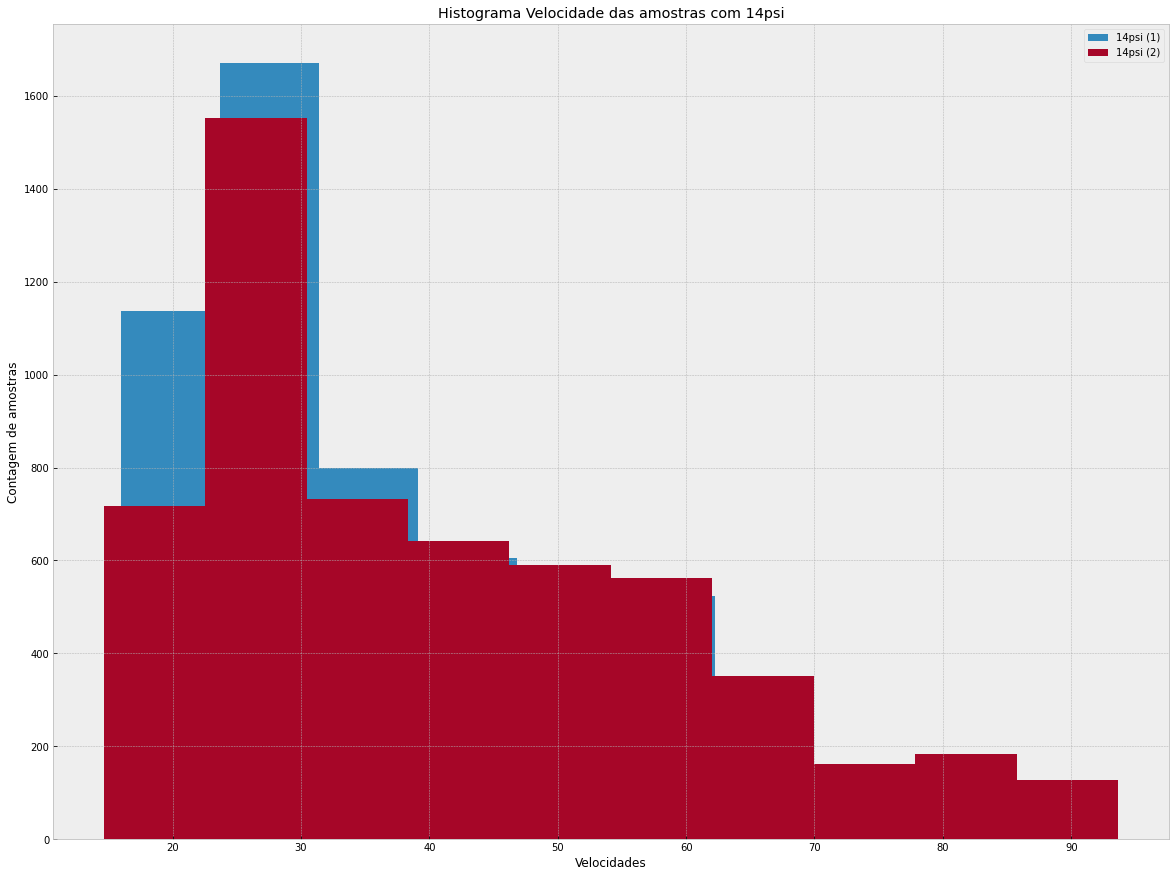

In [ ]:
#Histograma de velocidade - 14psi

psi14_1['GPS_Speed'].fillna(psi14_1['GPS_Speed'].mean(), inplace=True)
plt.hist(psi14_1['GPS_Speed'], bins = 10, label = "14psi (1)")

psi14_2['GPS_Speed'].fillna(psi14_2['GPS_Speed'].mean(), inplace=True)
plt.hist(psi14_2['GPS_Speed'], bins = 10, label = "14psi (2)")


plt.title('Histograma Velocidade das amostras com 14psi')
plt.xlabel('Velocidades')
plt.ylabel('Contagem de amostras')
plt.legend()
plt.style.use('bmh')
#plt.show
plt.savefig('Histograma RPM das amostras com 14psi.png')

In [ ]:
# Dados gerais 14psi (1° teste)

psi14_1.describe()

In [ ]:
# Dados gerais 12psi

psi12.describe()

In [ ]:
# Dados gerais 10psi

psi10.describe()

In [ ]:
# Dados gerais 14psi (2° teste)

psi14_2.describe()

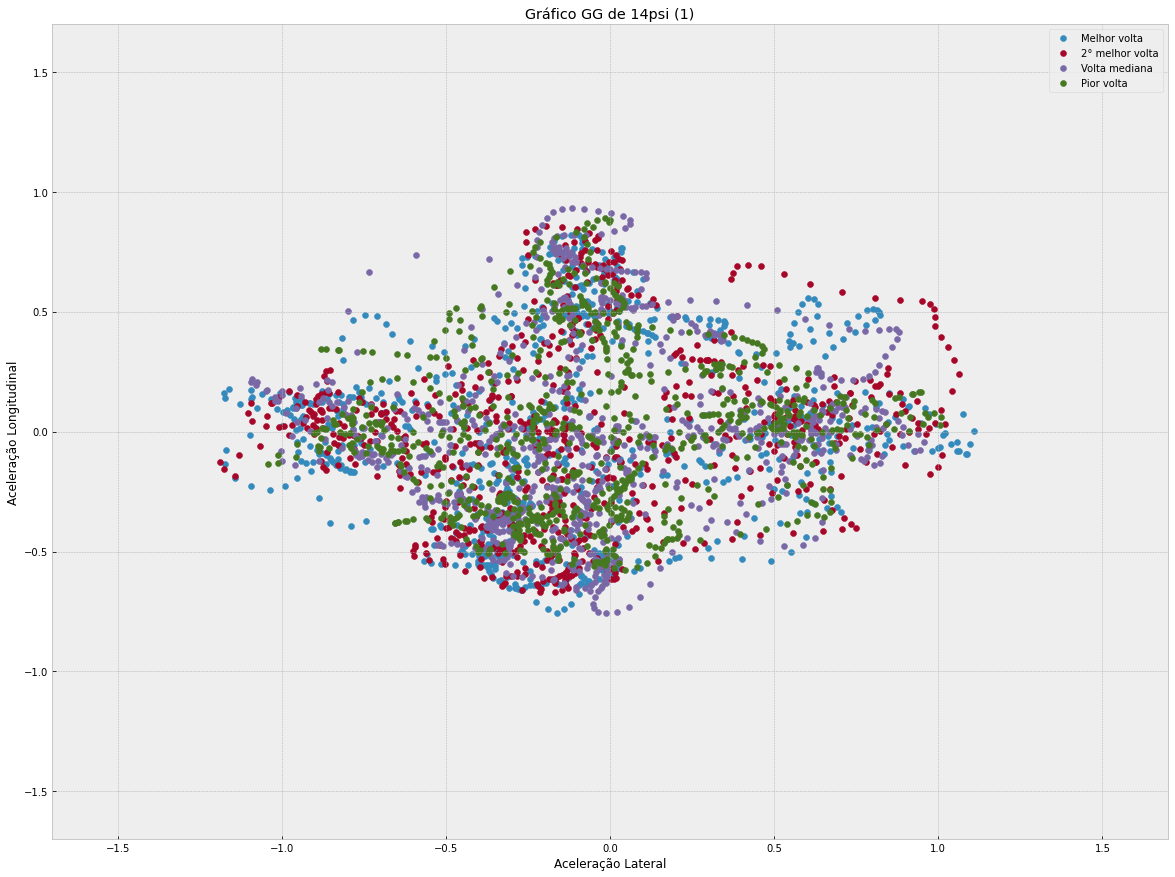

In [ ]:
#Gráfico GG de aceleração longitudinal x aceleração lateral - 14psi (1)

psi14melhor = psi14_1_melhor[psi14_1_melhor['RPM']>3000]
psi14melhor2 = psi14_1_2melhor[psi14_1_2melhor['RPM']>3000]
psi14mediana = psi14_1_mediana[psi14_1_mediana['RPM']>3000]
psi14pior = psi14_1_pior[psi14_1_pior['RPM']>3000]

plt.scatter(psi14melhor['GPS_LatAcc'], psi14melhor['GPS_LonAcc']*-1, label="Melhor volta")
plt.scatter(psi14melhor2['GPS_LatAcc'], psi14melhor2['GPS_LonAcc']*-1, label="2° melhor volta")
plt.scatter(psi14mediana['GPS_LatAcc'], psi14mediana['GPS_LonAcc']*-1, label="Volta mediana")
plt.scatter(psi14pior['GPS_LatAcc'], psi14pior['GPS_LonAcc']*-1, label="Pior volta")

plt.xlim(-1.7, 1.7)
plt.ylim(-1.7, 1.7)
plt.title('Gráfico GG de 14psi (1)') #adicionando o título
plt.xlabel('Aceleração Lateral')
plt.ylabel('Aceleração Longitudinal')
plt.legend()
plt.rcParams['figure.figsize'] = (20,15)
plt.style.use('bmh')
plt.savefig('Gráfico GG de 14psi (1).png')
#plt.show()

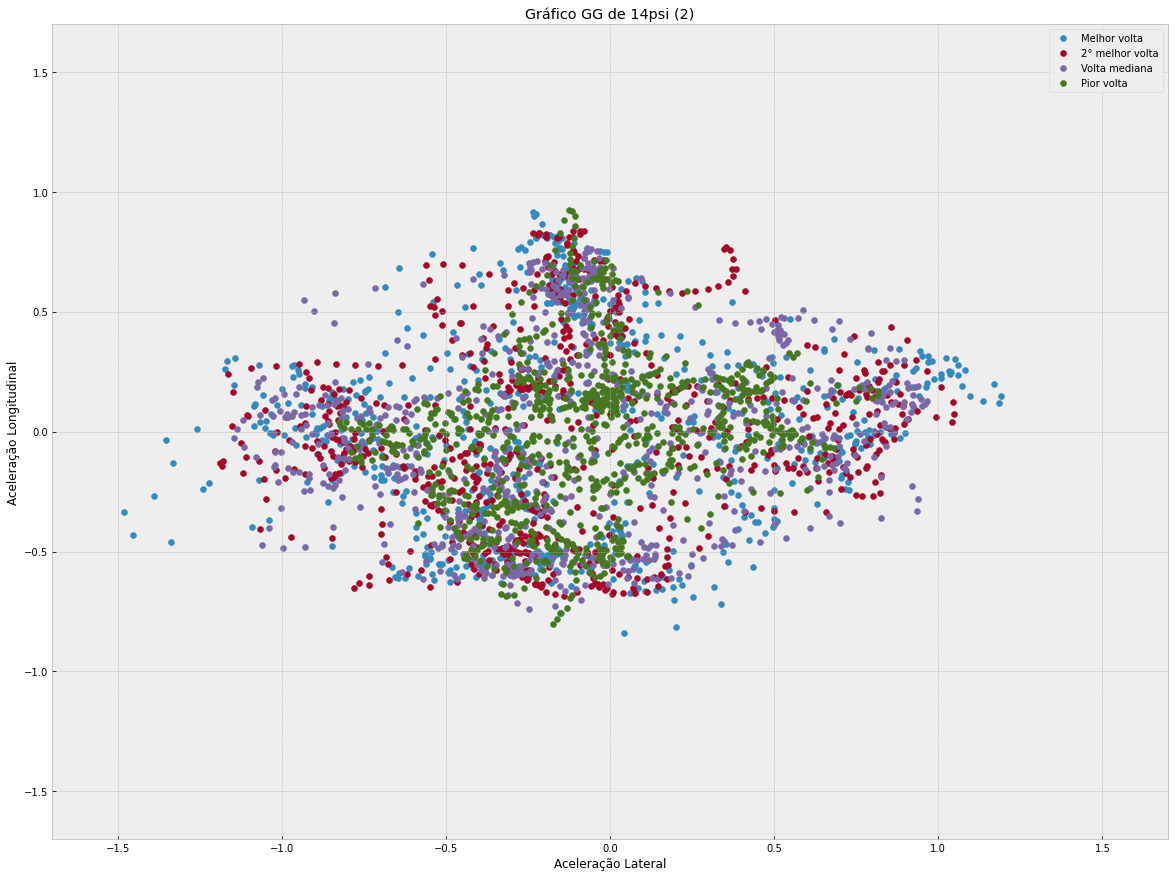

In [ ]:
#Gráfico GG de aceleração longitudinal x aceleração lateral - 14psi (2)

psi14melhor = psi14_2_melhor[psi14_2_melhor['RPM']>3000]
psi14melhor2 = psi14_2_2melhor[psi14_2_2melhor['RPM']>3000]
psi14mediana = psi14_2_mediana[psi14_2_mediana['RPM']>3000]
psi14pior = psi14_2_pior[psi14_2_pior['RPM']>3000]

plt.scatter(psi14melhor['GPS_LatAcc'], psi14melhor['GPS_LonAcc'], label="Melhor volta")
plt.scatter(psi14melhor2['GPS_LatAcc'], psi14melhor2['GPS_LonAcc'], label="2° melhor volta")
plt.scatter(psi14mediana['GPS_LatAcc'], psi14mediana['GPS_LonAcc'], label="Volta mediana")
plt.scatter(psi14pior['GPS_LatAcc'], psi14pior['GPS_LonAcc'], label="Pior volta")

plt.xlim(-1.7, 1.7)
plt.ylim(-1.7, 1.7)
plt.title('Gráfico GG de 14psi (2)') #adicionando o título
plt.xlabel('Aceleração Lateral')
plt.ylabel('Aceleração Longitudinal')
plt.legend()
plt.rcParams['figure.figsize'] = (20,15)
plt.style.use('bmh')
#plt.savefig('Gráfico GG de 14psi (2).png')
plt.show()

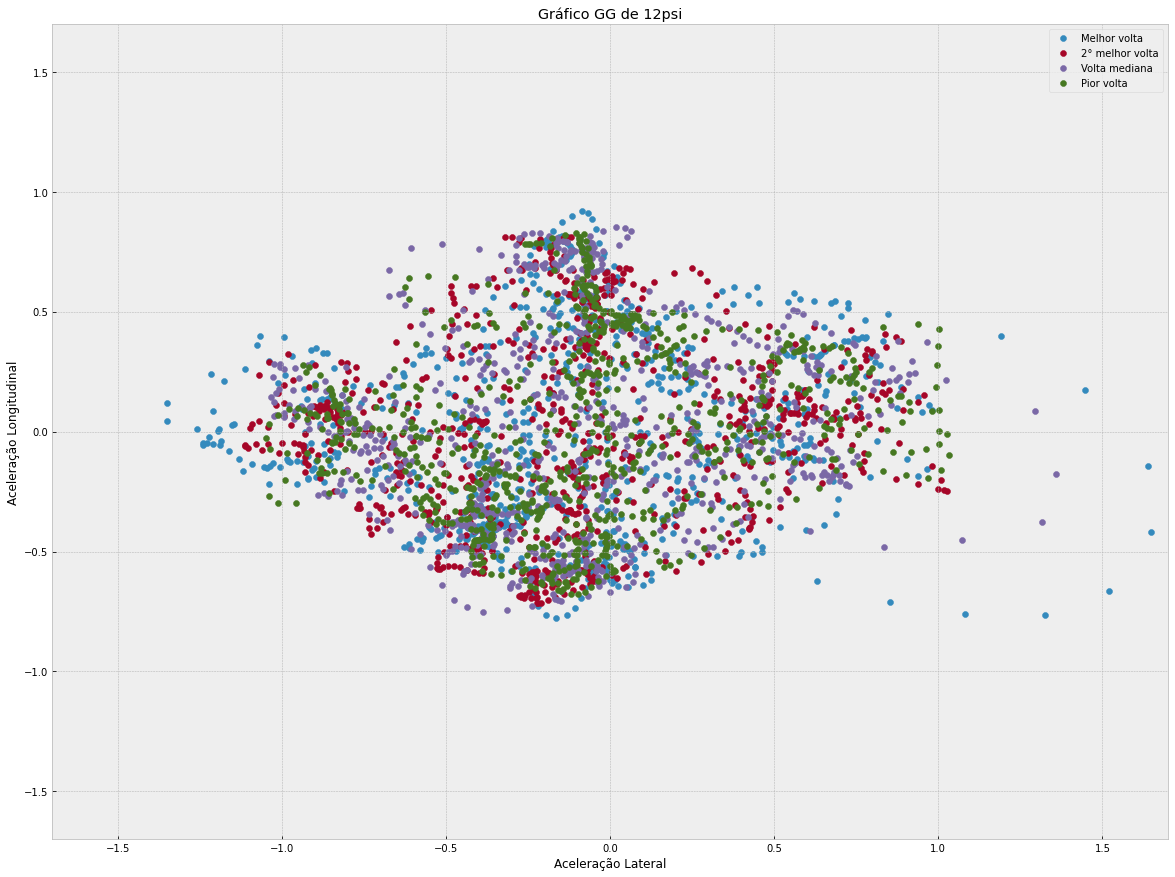

In [ ]:
#Gráfico GG de aceleração longitudinal x aceleração lateral - 12psi

psi12melhor = psi12_melhor[psi12_melhor['RPM']>3000]
psi12melhor2 = psi12_2melhor[psi12_2melhor['RPM']>3000]
psi12mediana = psi12_mediana[psi12_mediana['RPM']>3000]
psi12pior = psi12_pior[psi12_pior['RPM']>3000]

plt.scatter(psi12melhor['GPS_LatAcc'], psi12melhor['GPS_LonAcc'], label="Melhor volta")
plt.scatter(psi12melhor2['GPS_LatAcc'], psi12melhor2['GPS_LonAcc'], label="2° melhor volta")
plt.scatter(psi12mediana['GPS_LatAcc'], psi12mediana['GPS_LonAcc'], label="Volta mediana")
plt.scatter(psi12pior['GPS_LatAcc'], psi12pior['GPS_LonAcc'], label="Pior volta")

plt.xlim(-1.7, 1.7)
plt.ylim(-1.7, 1.7)
plt.title('Gráfico GG de 12psi') #adicionando o título
plt.xlabel('Aceleração Lateral')
plt.ylabel('Aceleração Longitudinal')
plt.legend()
plt.rcParams['figure.figsize'] = (20,15)
plt.style.use('bmh')
plt.savefig('Gráfico GG de 12psi.png')
#plt.show()

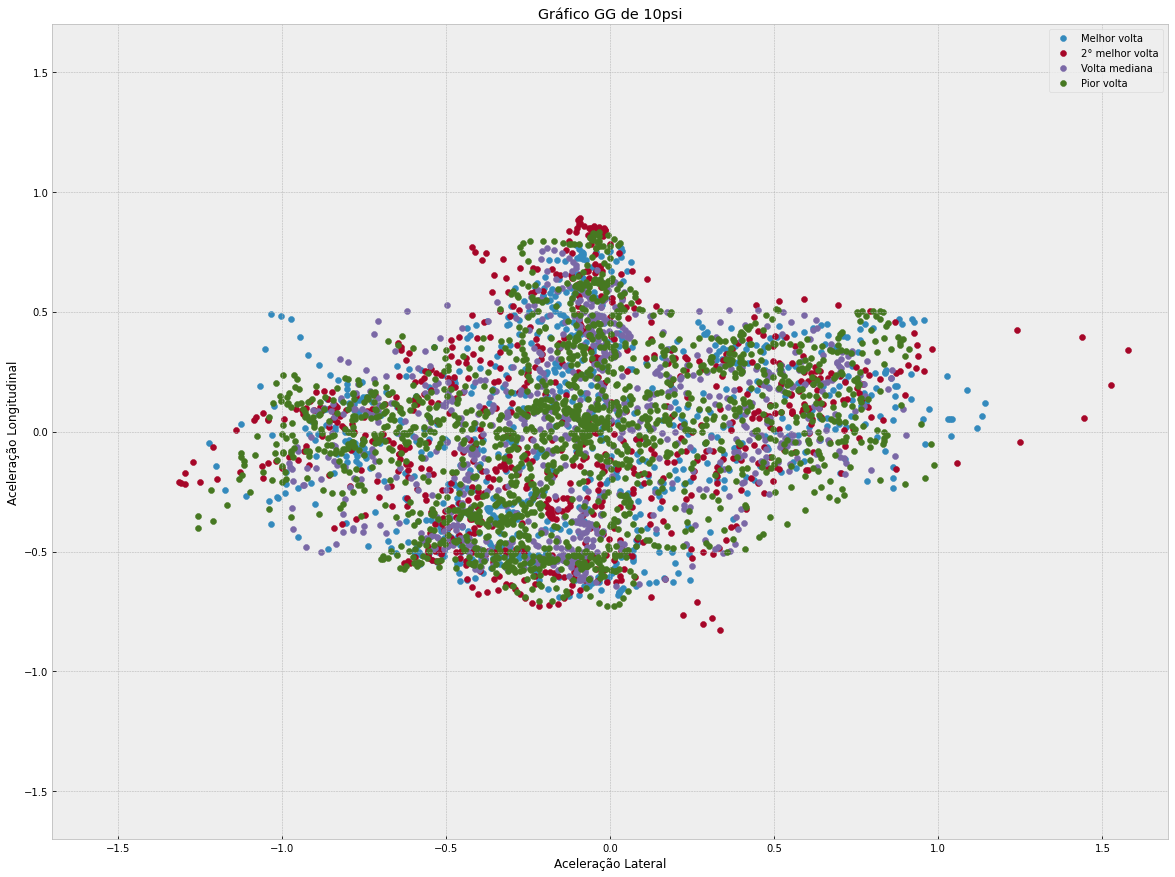

In [ ]:
#Gráfico GG de aceleração longitudinal x aceleração lateral - 10psi

psi10melhor = psi10_melhor[psi10_melhor['RPM']>3000]
psi10melhor2 = psi10_2melhor[psi10_2melhor['RPM']>3000]
psi10mediana = psi10_mediana[psi10_mediana['RPM']>3000]
psi10pior = psi10_pior[psi10_pior['RPM']>3000]

plt.scatter(psi10melhor['GPS_LatAcc'], psi10melhor['GPS_LonAcc'], label="Melhor volta")
plt.scatter(psi10melhor2['GPS_LatAcc'], psi10melhor2['GPS_LonAcc'], label="2° melhor volta")
plt.scatter(psi10mediana['GPS_LatAcc'], psi10mediana['GPS_LonAcc'], label="Volta mediana")
plt.scatter(psi10pior['GPS_LatAcc'], psi10pior['GPS_LonAcc'], label="Pior volta")

plt.xlim(-1.7, 1.7)
plt.ylim(-1.7, 1.7)
plt.title('Gráfico GG de 10psi') #adicionando o título
plt.xlabel('Aceleração Lateral')
plt.ylabel('Aceleração Longitudinal')
plt.legend()
plt.rcParams['figure.figsize'] = (20,15)
plt.style.use('bmh')
plt.savefig('Gráfico GG de 10psi.png')
#plt.show()

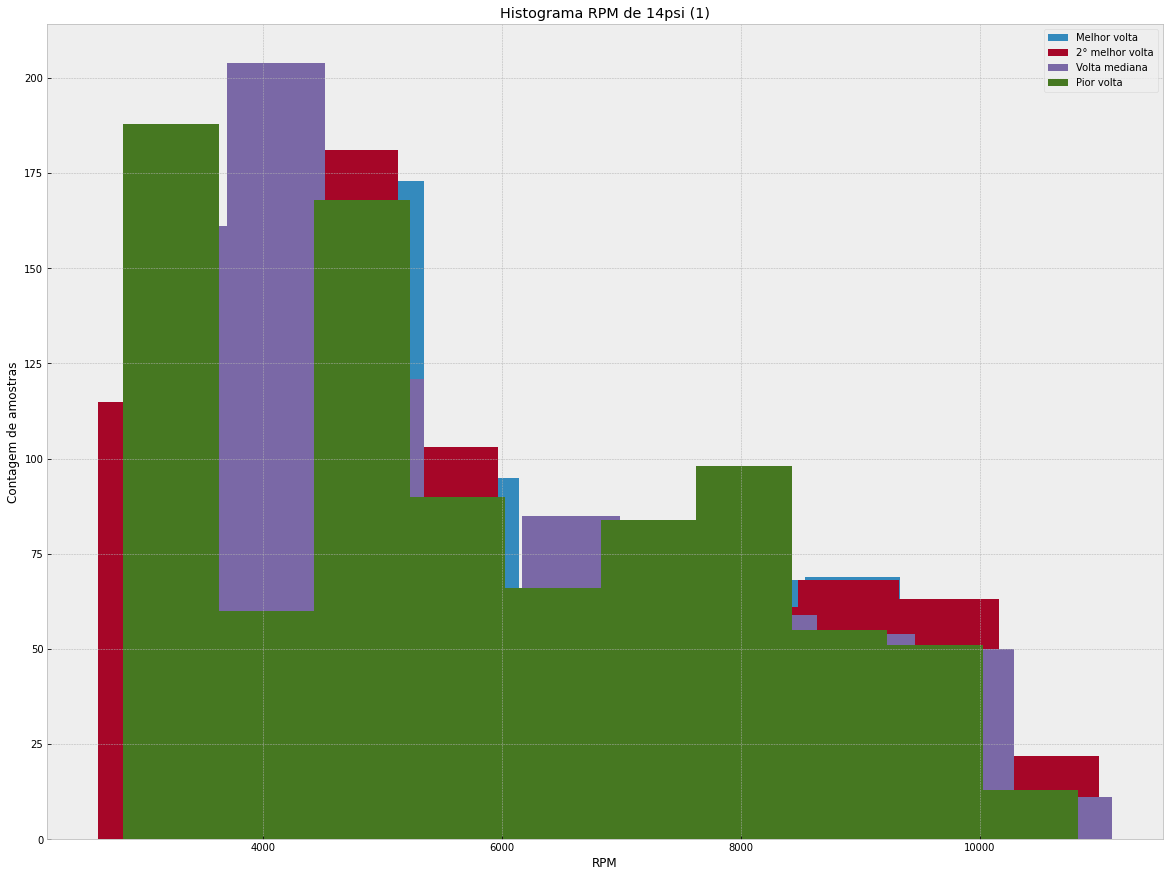

In [ ]:
#Histograma de RPM - 14psi (1)

psi14_1_melhor['RPM'].fillna(psi14_1_melhor['RPM'].mean(), inplace=True)
plt.hist(psi14_1_melhor['RPM'], bins = 10, label = "Melhor volta")

psi14_1_2melhor['RPM'].fillna(psi14_1_2melhor['RPM'].mean(), inplace=True)
plt.hist(psi14_1_2melhor['RPM'], bins = 10, label = "2° melhor volta")

psi14_1_mediana['RPM'].fillna(psi14_1_mediana['RPM'].mean(), inplace=True)
plt.hist(psi14_1_mediana['RPM'], bins = 10, label = "Volta mediana")

psi14_1_pior['RPM'].fillna(psi14_1_pior['RPM'].mean(), inplace=True)
plt.hist(psi14_1_pior['RPM'], bins = 10, label = "Pior volta")


plt.title('Histograma RPM de 14psi (1)')
plt.xlabel('RPM')
plt.ylabel('Contagem de amostras')
plt.legend()
plt.style.use('bmh')
#plt.show
plt.savefig('Histograma RPM de 14psi (1).png')

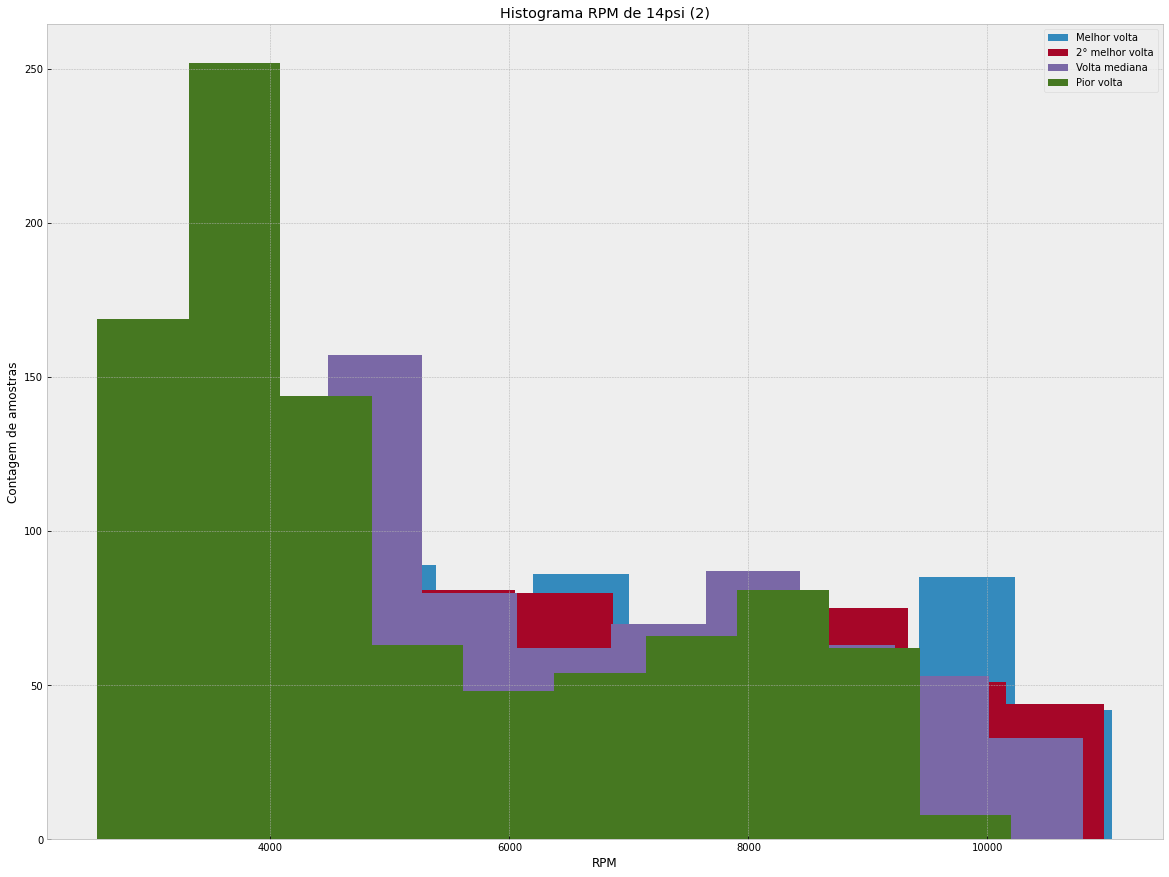

In [ ]:
#Histograma de RPM - 14psi (2)

psi14_2_melhor['RPM'].fillna(psi14_2_melhor['RPM'].mean(), inplace=True)
plt.hist(psi14_2_melhor['RPM'], bins = 10, label = "Melhor volta")

psi14_2_2melhor['RPM'].fillna(psi14_2_2melhor['RPM'].mean(), inplace=True)
plt.hist(psi14_2_2melhor['RPM'], bins = 10, label = "2° melhor volta")

psi14_2_mediana['RPM'].fillna(psi14_2_mediana['RPM'].mean(), inplace=True)
plt.hist(psi14_2_mediana['RPM'], bins = 10, label = "Volta mediana")

psi14_2_pior['RPM'].fillna(psi14_2_pior['RPM'].mean(), inplace=True)
plt.hist(psi14_2_pior['RPM'], bins = 10, label = "Pior volta")


plt.title('Histograma RPM de 14psi (2)')
plt.xlabel('RPM')
plt.ylabel('Contagem de amostras')
plt.legend()
plt.style.use('bmh')
#plt.show
plt.savefig('Histograma RPM de 14psi (2).png')

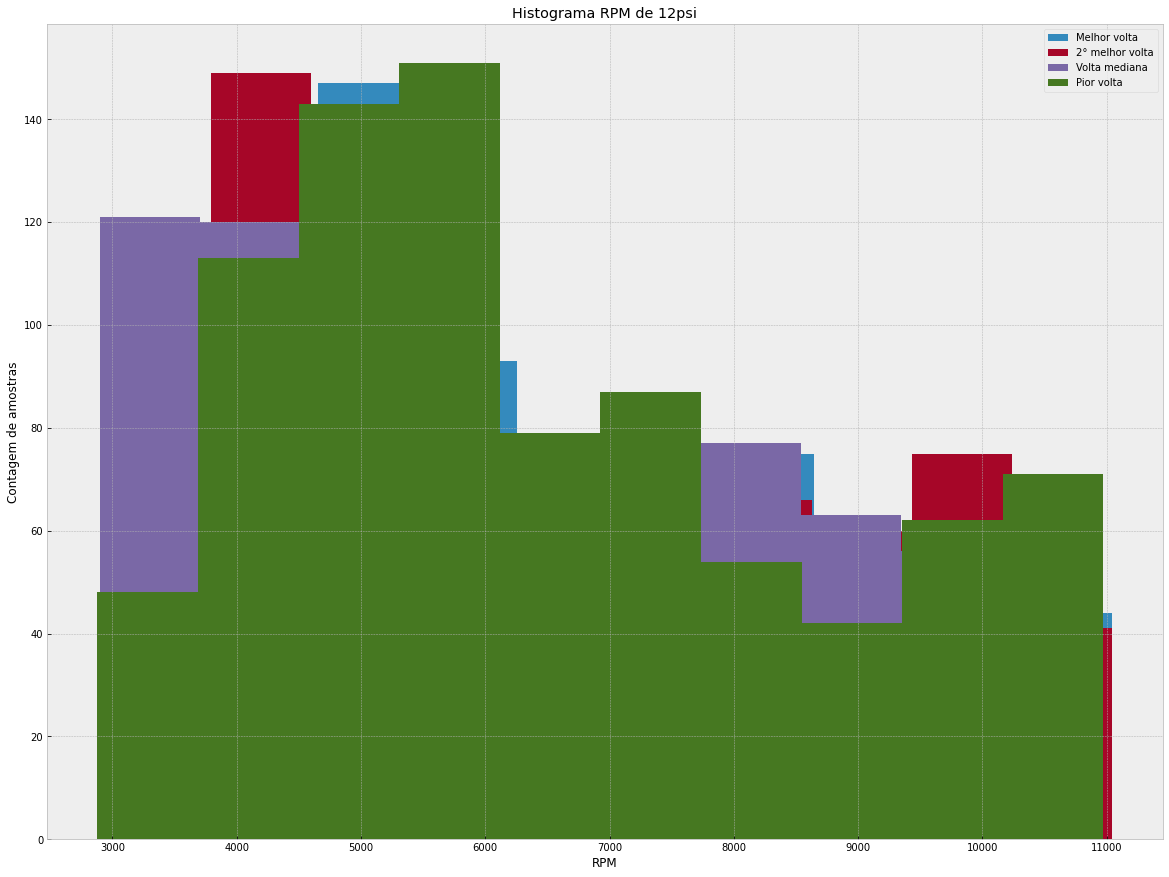

In [ ]:
#Histograma de RPM - 12psi

psi12_melhor['RPM'].fillna(psi12_melhor['RPM'].mean(), inplace=True)
plt.hist(psi12_melhor['RPM'], bins = 10, label = "Melhor volta")

psi12_2melhor['RPM'].fillna(psi12_2melhor['RPM'].mean(), inplace=True)
plt.hist(psi12_2melhor['RPM'], bins = 10, label = "2° melhor volta")

psi12_mediana['RPM'].fillna(psi12_mediana['RPM'].mean(), inplace=True)
plt.hist(psi12_mediana['RPM'], bins = 10, label = "Volta mediana")

psi12_pior['RPM'].fillna(psi12_pior['RPM'].mean(), inplace=True)
plt.hist(psi12_pior['RPM'], bins = 10, label = "Pior volta")


plt.title('Histograma RPM de 12psi')
plt.xlabel('RPM')
plt.ylabel('Contagem de amostras')
plt.legend()
plt.style.use('bmh')
#plt.show
plt.savefig('Histograma RPM de 12psi')

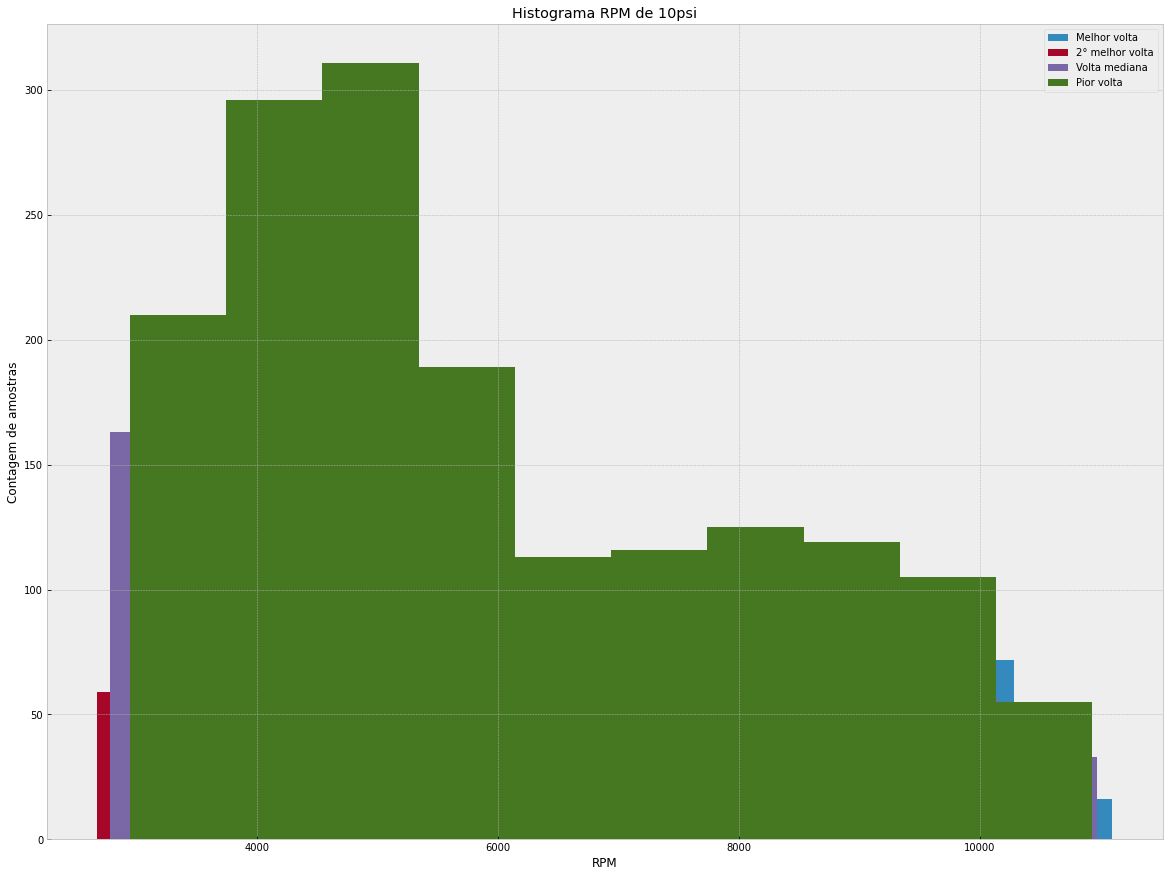

In [ ]:
#Histograma de RPM - 10psi

psi10_melhor['RPM'].fillna(psi10_melhor['RPM'].mean(), inplace=True)
plt.hist(psi10_melhor['RPM'], bins = 10, label = "Melhor volta")

psi10_2melhor['RPM'].fillna(psi10_2melhor['RPM'].mean(), inplace=True)
plt.hist(psi10_2melhor['RPM'], bins = 10, label = "2° melhor volta")

psi10_mediana['RPM'].fillna(psi10_mediana['RPM'].mean(), inplace=True)
plt.hist(psi10_mediana['RPM'], bins = 10, label = "Volta mediana")

psi10_pior['RPM'].fillna(psi10_pior['RPM'].mean(), inplace=True)
plt.hist(psi10_pior['RPM'], bins = 10, label = "Pior volta")


plt.title('Histograma RPM de 10psi')
plt.xlabel('RPM')
plt.ylabel('Contagem de amostras')
plt.legend()
plt.style.use('bmh')
#plt.show
plt.savefig('Histograma RPM de 10psi')

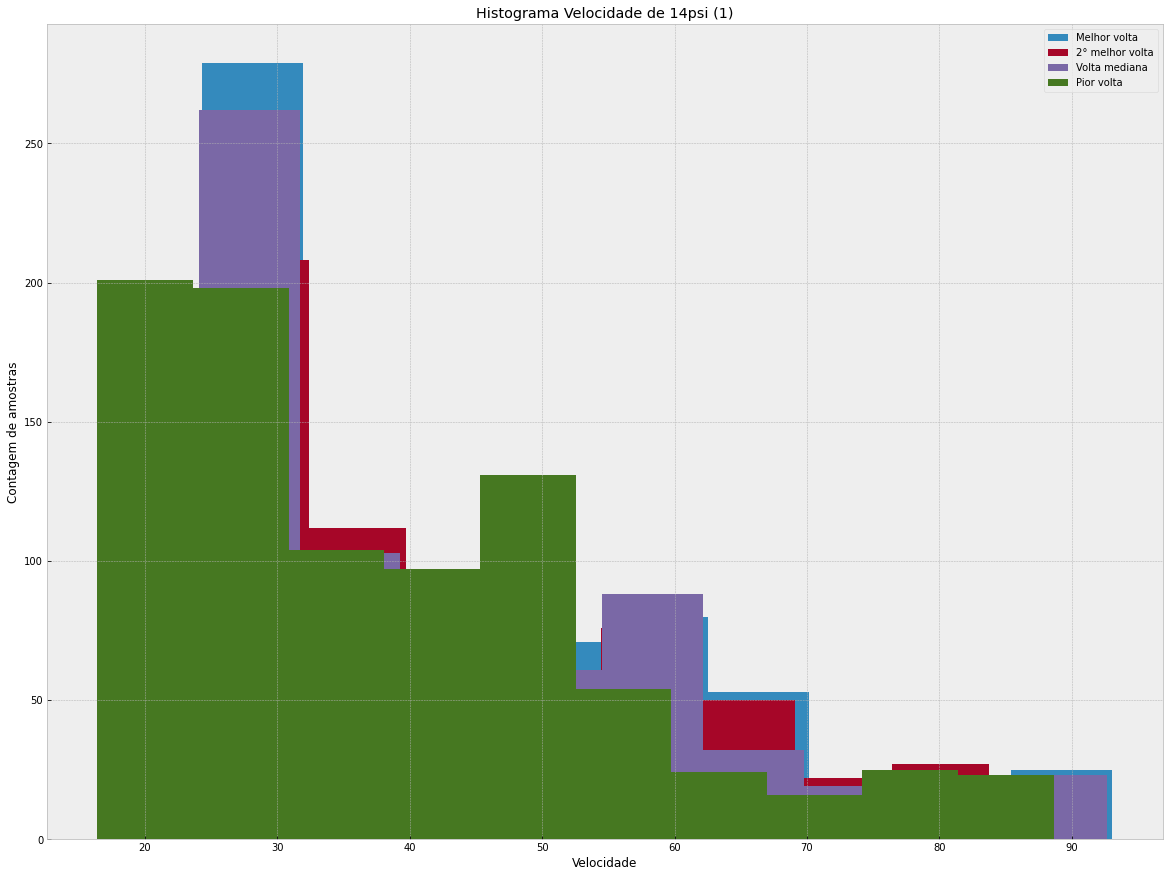

In [ ]:
#Histograma de Velocidade - 14psi (1)

psi14_1_melhor['GPS_Speed'].fillna(psi14_1_melhor['GPS_Speed'].mean(), inplace=True)
plt.hist(psi14_1_melhor['GPS_Speed'], bins = 10, label = "Melhor volta")

psi14_1_2melhor['GPS_Speed'].fillna(psi14_1_2melhor['GPS_Speed'].mean(), inplace=True)
plt.hist(psi14_1_2melhor['GPS_Speed'], bins = 10, label = "2° melhor volta")

psi14_1_mediana['GPS_Speed'].fillna(psi14_1_mediana['GPS_Speed'].mean(), inplace=True)
plt.hist(psi14_1_mediana['GPS_Speed'], bins = 10, label = "Volta mediana")

psi14_1_pior['GPS_Speed'].fillna(psi14_1_pior['GPS_Speed'].mean(), inplace=True)
plt.hist(psi14_1_pior['GPS_Speed'], bins = 10, label = "Pior volta")


plt.title('Histograma Velocidade de 14psi (1)')
plt.xlabel('Velocidade')
plt.ylabel('Contagem de amostras')
plt.legend()
plt.style.use('bmh')
#plt.show
plt.savefig('Histograma Velocidade de 14psi (1).png')

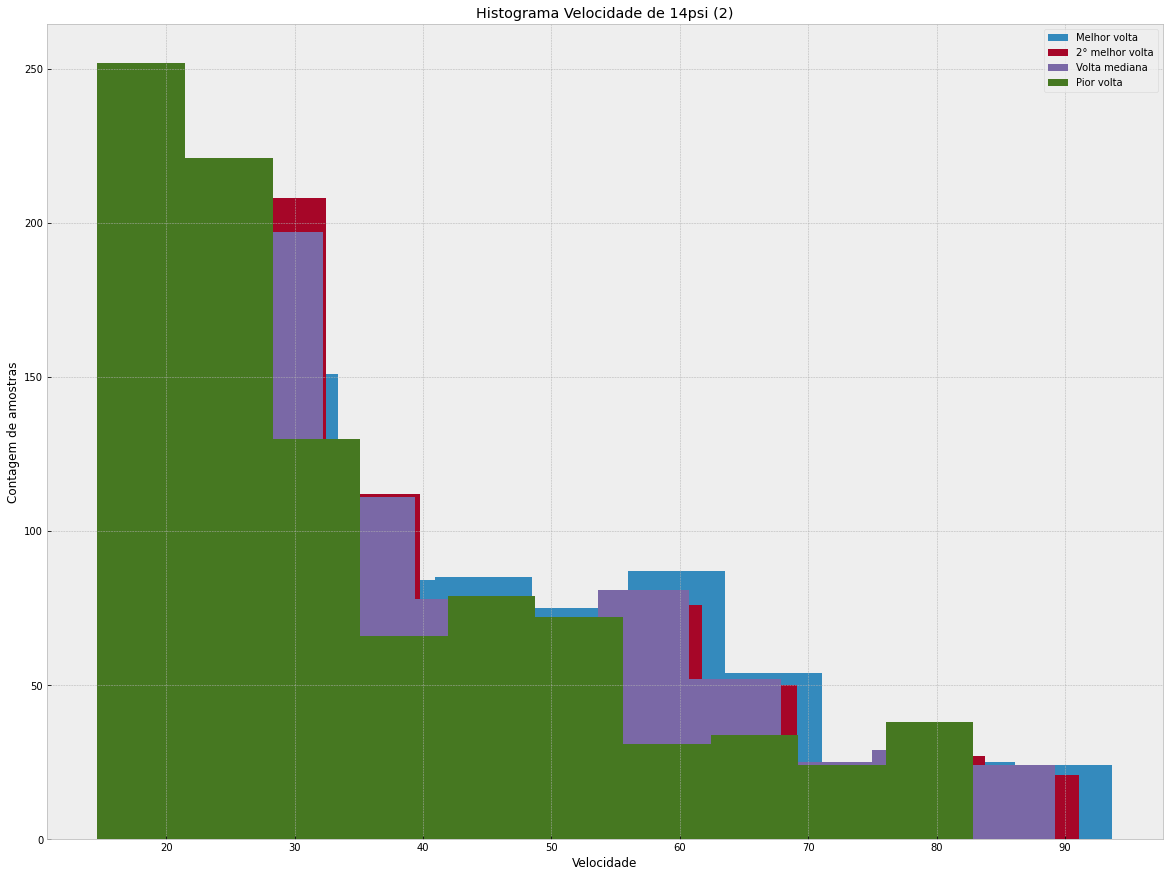

In [ ]:
#Histograma de Velocidade - 14psi (2)

psi14_2_melhor['GPS_Speed'].fillna(psi14_2_melhor['GPS_Speed'].mean(), inplace=True)
plt.hist(psi14_2_melhor['GPS_Speed'], bins = 10, label = "Melhor volta")

psi14_1_2melhor['GPS_Speed'].fillna(psi14_2_2melhor['GPS_Speed'].mean(), inplace=True)
plt.hist(psi14_1_2melhor['GPS_Speed'], bins = 10, label = "2° melhor volta")

psi14_2_mediana['GPS_Speed'].fillna(psi14_2_mediana['GPS_Speed'].mean(), inplace=True)
plt.hist(psi14_2_mediana['GPS_Speed'], bins = 10, label = "Volta mediana")

psi14_2_pior['GPS_Speed'].fillna(psi14_2_pior['GPS_Speed'].mean(), inplace=True)
plt.hist(psi14_2_pior['GPS_Speed'], bins = 10, label = "Pior volta")


plt.title('Histograma Velocidade de 14psi (2)')
plt.xlabel('Velocidade')
plt.ylabel('Contagem de amostras')
plt.legend()
plt.style.use('bmh')
#plt.show
plt.savefig('Histograma Velocidade de 1q2psi=')

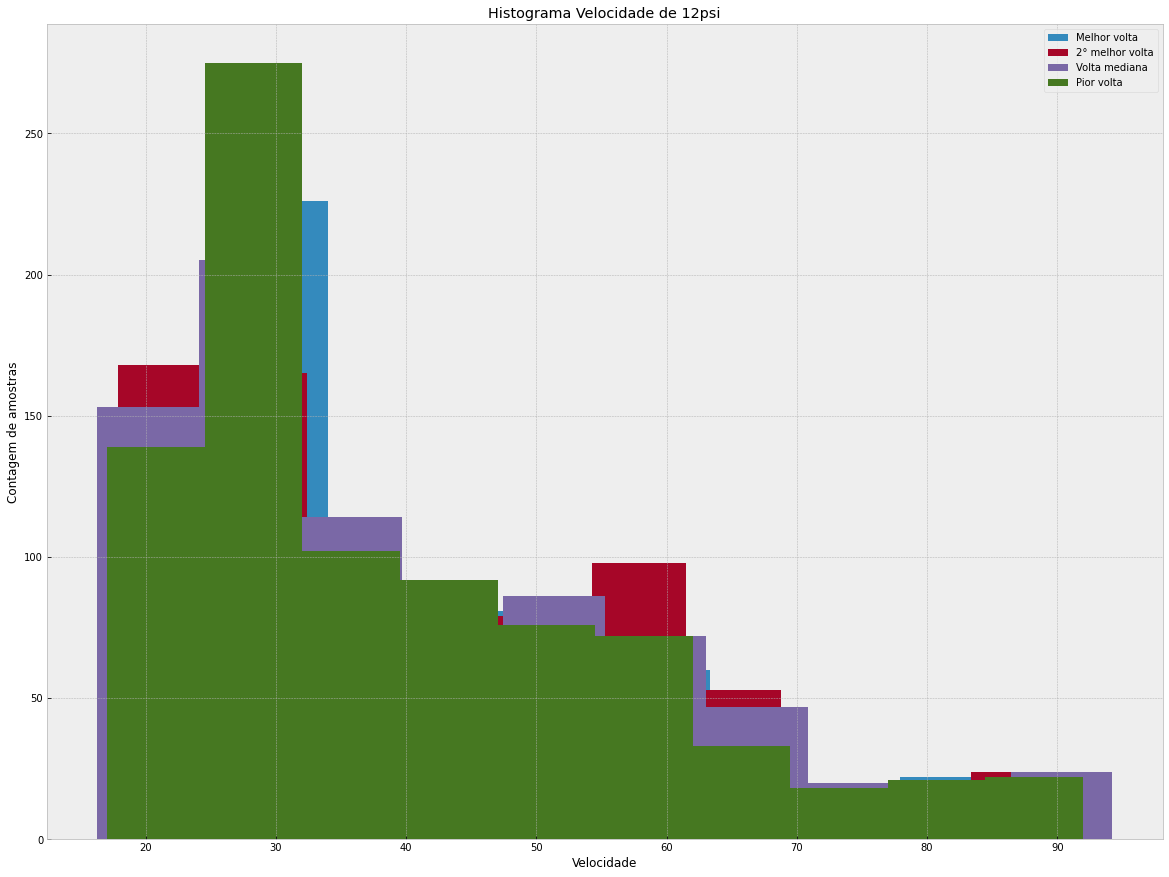

In [ ]:
#Histograma de Velocidade - 12psi

psi12_melhor['GPS_Speed'].fillna(psi12_melhor['GPS_Speed'].mean(), inplace=True)
plt.hist(psi12_melhor['GPS_Speed'], bins = 10, label = "Melhor volta")

psi12_2melhor['GPS_Speed'].fillna(psi12_2melhor['GPS_Speed'].mean(), inplace=True)
plt.hist(psi12_2melhor['GPS_Speed'], bins = 10, label = "2° melhor volta")

psi12_mediana['GPS_Speed'].fillna(psi12_mediana['GPS_Speed'].mean(), inplace=True)
plt.hist(psi12_mediana['GPS_Speed'], bins = 10, label = "Volta mediana")

psi12_pior['GPS_Speed'].fillna(psi12_pior['GPS_Speed'].mean(), inplace=True)
plt.hist(psi12_pior['GPS_Speed'], bins = 10, label = "Pior volta")


plt.title('Histograma Velocidade de 12psi')
plt.xlabel('Velocidade')
plt.ylabel('Contagem de amostras')
plt.legend()
plt.style.use('bmh')
#plt.show
plt.savefig('Histograma Velocidade de 12psi.png')

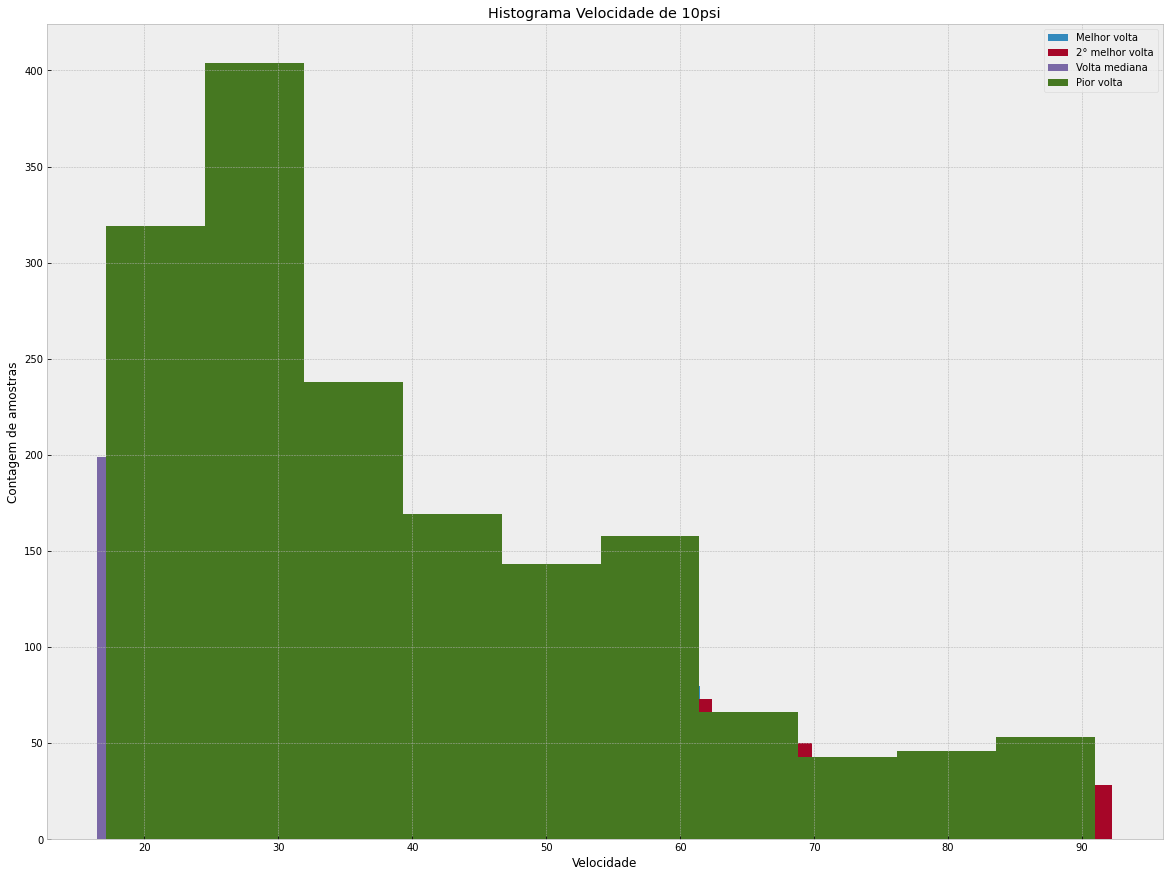

In [ ]:
#Histograma de Velocidade - 10psi

psi10_melhor['GPS_Speed'].fillna(psi10_melhor['GPS_Speed'].mean(), inplace=True)
plt.hist(psi10_melhor['GPS_Speed'], bins = 10, label = "Melhor volta")

psi10_2melhor['GPS_Speed'].fillna(psi10_2melhor['GPS_Speed'].mean(), inplace=True)
plt.hist(psi10_2melhor['GPS_Speed'], bins = 10, label = "2° melhor volta")

psi10_mediana['GPS_Speed'].fillna(psi10_mediana['GPS_Speed'].mean(), inplace=True)
plt.hist(psi10_mediana['GPS_Speed'], bins = 10, label = "Volta mediana")

psi10_pior['GPS_Speed'].fillna(psi10_pior['GPS_Speed'].mean(), inplace=True)
plt.hist(psi10_pior['GPS_Speed'], bins = 10, label = "Pior volta")


plt.title('Histograma Velocidade de 10psi')
plt.xlabel('Velocidade')
plt.ylabel('Contagem de amostras')
plt.legend()
plt.style.use('bmh')
#plt.show
plt.savefig('Histograma Velocidade de 10psi.png')

In [ ]:
psi14_1_melhor.describe()

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
count,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000
mean,19.874990,0.221760,6192.327157,41.830566,-0.120655,0.000526
std,11.496468,0.140248,2048.227375,18.036308,0.503001,0.383479
min,0.000000,0.000000,2960.337646,16.676001,-1.175439,-0.819584
25%,9.937500,0.090750,4579.087647,28.051002,-0.395360,-0.322711
50%,19.875000,0.194500,5564.636719,34.713003,-0.143263,0.017476
75%,29.812500,0.354250,7999.838013,54.416502,0.146674,0.300466
max,39.742000,0.462000,10919.767578,93.035995,1.109949,0.756604


In [ ]:
psi14_2_melhor.describe()

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,18.574992,0.220618,6681.477957,44.462114,-0.128043,-0.000174
std,10.745916,0.139045,2249.162035,18.960989,0.530521,0.399814
min,0.000000,0.000000,2960.325928,18.320002,-1.480373,-0.915896
25%,9.287500,0.090750,4615.416504,28.080002,-0.453232,-0.275116
50%,18.575000,0.191000,6506.076660,41.155000,-0.177430,0.012938
75%,27.862500,0.355250,8592.045899,58.735001,0.182529,0.329655
max,37.144000,0.459000,11042.859375,93.660004,1.190965,0.838717


In [ ]:
psi12_melhor.describe()

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,19.699977,0.220743,6408.626179,41.832343,-0.111362,-0.002193
std,11.395409,0.138723,2182.497741,17.763554,0.490537,0.387549
min,0.000000,0.000000,3058.708740,19.342001,-1.350690,-0.919408
25%,9.850000,0.091000,4664.929199,28.374001,-0.381112,-0.313352
50%,19.700000,0.192000,5849.687012,35.190998,-0.121104,0.039412
75%,29.550000,0.353000,8149.141113,53.201000,0.157655,0.318336
max,39.382000,0.457000,11041.958984,92.595001,1.647110,0.776348


In [ ]:
psi10_melhor.describe()

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,19.174953,0.220909,6479.334251,43.015766,-0.114579,-0.001873
std,11.092259,0.137919,2184.338595,17.900389,0.483141,0.369566
min,0.000000,0.000000,2931.693604,17.506001,-1.221652,-0.777871
25%,9.587500,0.093000,4558.642578,27.721750,-0.437088,-0.274286
50%,19.175000,0.191500,6427.502197,40.680000,-0.149844,-0.015599
75%,28.762500,0.352250,8553.777832,55.437000,0.180464,0.305429
max,38.314000,0.458000,11097.156250,90.778999,1.143306,0.688194


In [ ]:
psi14_1_pior.describe()

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
count,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000
mean,21.799961,0.227530,5803.961131,38.146097,-0.098013,-0.002486
std,12.607817,0.140176,2100.760140,16.710195,0.432819,0.319794
min,0.000000,0.000000,2829.085449,16.405001,-1.090491,-0.891869
25%,10.900000,0.101000,3888.889648,25.385000,-0.393387,-0.191961
50%,21.800000,0.197000,5362.754883,32.895000,-0.125775,0.008795
75%,32.700000,0.366000,7605.916504,48.654999,0.156144,0.266528
max,43.566000,0.461000,10823.719727,88.630005,1.007480,0.576012


In [ ]:
psi14_2_pior.describe()

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,23.649983,0.206230,5114.181426,34.846051,-0.088399,0.007738
std,13.675953,0.139237,2043.712656,17.330091,0.350149,0.297649
min,0.000000,0.000000,2551.714844,14.630000,-0.877561,-0.922875
25%,11.825000,0.078000,3411.612549,21.308750,-0.328429,-0.164094
50%,23.650000,0.178000,4348.377441,28.285000,-0.077594,-0.010834
75%,35.475000,0.336000,6893.179200,46.399999,0.110623,0.178164
max,47.284000,0.458000,10200.083008,82.855003,0.816124,0.800924


In [ ]:
psi12_pior.describe()

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,21.224999,0.222724,6449.142463,39.224860,-0.107228,-0.000742
std,12.275906,0.139992,2154.464583,17.446278,0.449464,0.354121
min,0.000000,0.000000,2880.023682,17.032000,-1.049517,-0.828723
25%,10.612500,0.092000,4718.471557,25.841000,-0.398731,-0.258320
50%,21.225000,0.194000,5886.213623,32.599001,-0.098237,0.014569
75%,31.837500,0.353750,7877.579834,50.038002,0.127602,0.275056
max,42.449000,0.462000,10973.390625,91.982002,1.032259,0.678111


In [ ]:
psi10_pior.describe()

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000
mean,20.500930,0.217542,5980.751595,40.238063,-0.115102,0.004758
std,11.898402,0.139338,2107.277308,17.761803,0.449554,0.338572
min,0.000000,0.000000,2941.259521,17.148001,-1.255946,-0.830737
25%,10.225000,0.088000,4373.574218,26.446000,-0.391749,-0.215523
50%,20.450000,0.189000,5349.270508,33.934002,-0.106305,-0.011803
75%,30.700000,0.350500,7704.464356,51.939999,0.121091,0.261831
max,42.699000,0.459000,10935.040039,90.956001,0.985760,0.728817
